# Multiple Linear Regression

## Objectives

- Dealing with categorical variables

- Diagnosis of the model fit

In [1]:
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# load Credit data (from https://www.kaggle.com/avikpaul4u/credit-card-balance)
df = pd.read_csv('data/Credit.csv', index_col=0)
df = df.drop(columns='Ethnicity')
df.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Balance
1,14.891,3606,283,2,34,11,Male,No,Yes,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,903
3,104.593,7075,514,4,71,11,Male,No,No,580
4,148.924,9504,681,3,36,11,Female,No,No,964
5,55.882,4897,357,2,68,16,Male,No,Yes,331


In [3]:
len(df.Income.value_counts())

399

In [6]:
len(df.Gender.value_counts())

2

In [8]:
# Define the problem
outcome = 'Balance'
x_cols = ['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Gender',
          'Student', 'Married']
x_continuous = ['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education']

In [10]:
# Problem: let's calculate multiple regression witout categorical variables

In [11]:
#do it with stats models
import statsmodels.api as sm

In [25]:
categorical_model = sm.OLS(df.Balance,sm.add_constant(df[x_continuous]))


In [24]:
cat_results = categorical_model.fit()
cat_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     472.5
Date:                Wed, 24 Jun 2020   Prob (F-statistic):          3.01e-176
Time:                        13:40:40   Log-Likelihood:                -2598.2
No. Observations:                 400   AIC:                             5210.
Df Residuals:                     393   BIC:                             5238.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -477.9581     55.065     -8.680      0.000    -586.217    -369.699
Income        -7.5580      0.382    -19.766      0.000      -8.310      -6.806
Limit          0.1259      0.053      2.373      0.018       0.022       0.230
Rating         2.0631      0.794      2.598      0.010       0.502       3.625
Cards         11.5916      7.067      1.640      0.102      -2.302      25.485
Age           -0.8924      0.478     -1.867      0.063      -1.832       0.048
Education      1.9983      2.600      0.769      0.443      -3.113       7.110
==============================================================================
Omnibus:                       96.489   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              170.212
Skew:                           1.397   Prob(JB):                     1.09e-37
Kurtosis:                       4.553   Cond. No.                     3.60e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.6e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Dealing with Categorical Variables


### With Pandas `get_dummies()`

In [28]:
categorical_variables = ['Gender', 'Student', 'Married']
#dont have to pass through - it will try to find cat values for us

In [27]:
# one hot encode variables
df_ohe = pd.get_dummies(df[x_cols],
                        columns=categorical_variables,
                        drop_first=True #keeps columns for M/F - introduce colinearity by leaving in
)
print(df_ohe.shape)
df_ohe.head(3)

(400, 9)


,Income,Limit,Rating,Cards,Age,Education,Gender_Female,Student_Yes,Married_Yes
1,14.891,3606,283,2,34,11,0,0,1
2,106.025,6645,483,3,82,15,1,1,1
3,104.593,7075,514,4,71,11,0,0,0


### With `sklearn` One Hot Encoder

In [29]:
from sklearn.preprocessing import OneHotEncoder

from sklearn.compose import ColumnTransformer

In [30]:
# create an encoder object. This will help us to convert
# categorical variables to new columns
encoder = OneHotEncoder(handle_unknown='error',
                        drop='first',
                        categories='auto')

# Create an columntransformer object.
# This will help us to merge transformed columns
# with the rest of the dataset.

ct = ColumnTransformer(transformers=[('ohe', encoder, categorical_variables)],
                       remainder='passthrough')
ct.fit(df[x_cols])
X = ct.transform(df[x_cols])

In [31]:
X.shape

(400, 9)

Now we let's try to understand what it means to add categorical variables to our model.

In [35]:
ct.get_feature_names()

NotImplementedError: get_feature_names is not yet supported when using a 'passthrough' transformer.

In [32]:
X[:5]

array([[0.00000e+00, 0.00000e+00, 1.00000e+00, 1.48910e+01, 3.60600e+03,
        2.83000e+02, 2.00000e+00, 3.40000e+01, 1.10000e+01],
       [1.00000e+00, 1.00000e+00, 1.00000e+00, 1.06025e+02, 6.64500e+03,
        4.83000e+02, 3.00000e+00, 8.20000e+01, 1.50000e+01],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, 1.04593e+02, 7.07500e+03,
        5.14000e+02, 4.00000e+00, 7.10000e+01, 1.10000e+01],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, 1.48924e+02, 9.50400e+03,
        6.81000e+02, 3.00000e+00, 3.60000e+01, 1.10000e+01],
       [0.00000e+00, 0.00000e+00, 1.00000e+00, 5.58820e+01, 4.89700e+03,
        3.57000e+02, 2.00000e+00, 6.80000e+01, 1.60000e+01]])

In [36]:
X = df_ohe
X.head(3)

,Income,Limit,Rating,Cards,Age,Education,Gender_Female,Student_Yes,Married_Yes
1,14.891,3606,283,2,34,11,0,0,1
2,106.025,6645,483,3,82,15,1,1,1
3,104.593,7075,514,4,71,11,0,0,0


In [38]:
y = df.Balance

Xconst = sm.add_constant(X)
model = sm.OLS(y, Xconst, hasconst=True)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     918.2
Date:                Wed, 24 Jun 2020   Prob (F-statistic):          2.49e-256
Time:                        13:58:07   Log-Likelihood:                -2399.4
No. Observations:                 400   AIC:                             4819.
Df Residuals:                     390   BIC:                             4859.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -468.4037     34.355    -13.634      0.000    -535.948    -400.859
Income           -7.8020      0.234    -33.349      0.000      -8.262      -7.342
Limit             0.1931      0.033      5.909      0.000       0.129       0.257
Rating            1.1023      0.489      2.253      0.025       0.140       2.064
Cards            17.9233      4.332      4.137      0.000       9.406      26.441
Age              -0.6347      0.293     -2.164      0.031      -1.211      -0.058
Education        -1.1150      1.596     -0.699      0.485      -4.253       2.023
Gender_Female   -10.4067      9.904     -1.051      0.294     -29.879       9.065
Student_Yes     426.4692     16.678     25.571      0.000     393.680     459.259
Married_Yes      -7.0191     10.278     -0.683      0.495     -27.226      13.188
==============================================================================
Omnibus:                       34.234   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.854
Skew:                           0.775   Prob(JB):                     1.34e-09
Kurtosis:                       3.217   Cond. No.                     3.68e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.68e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

drop anything where P > .05
ie ed, gender, married
adj R2 accts for degree of freedom

Note that the $R^{2}$ and $R^{2}_{adj}$ increased significantly but at the same time some predictors p_values are not significant anymore.

W can easily convert it to an adjusted $R^{2}$ by using the formula:

$$ \bar{R}^{2} = 1 - (1- R^{2})\frac{n-1}{n-p-1}$$

where $p$ is the total number of features used to train model.

[Wikipedia-$R^{2}$](https://en.wikipedia.org/wiki/Coefficient_of_determination#Adjusted_R2)

### Multicollinearity

As we discussed before the multicollinearity is a problem for interprettability and confidence intervels. Now we will see how to detect multicolinearity and how to solve this problem.

[Statistics by Jim - Multicollinearity in linear regression](https://statisticsbyjim.com/regression/multicollinearity-in-regression-analysis/)


[Wikipedia VIF - Calculation and Analysis](https://en.wikipedia.org/wiki/Variance_inflation_factor)

In [39]:
# One way of detecting multicollinearity is Variance inflation factor.

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [40]:
X.head(3)

,Income,Limit,Rating,Cards,Age,Education,Gender_Female,Student_Yes,Married_Yes
1,14.891,3606,283,2,34,11,0,0,1
2,106.025,6645,483,3,82,15,1,1,1
3,104.593,7075,514,4,71,11,0,0,0


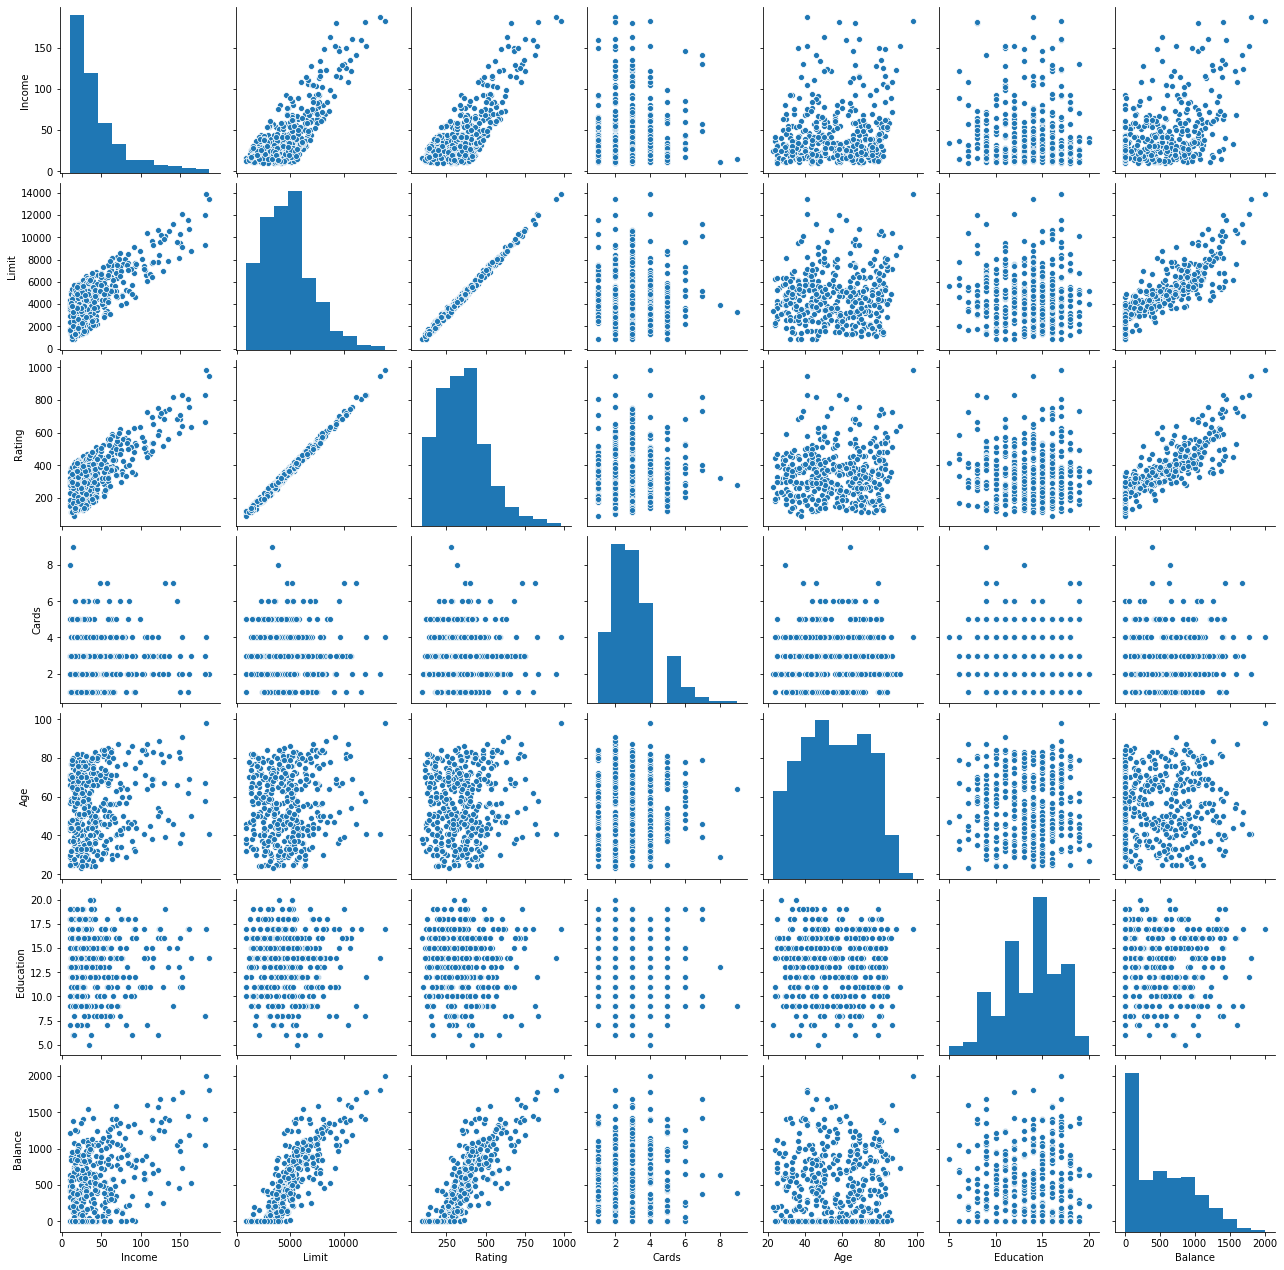

In [41]:
sns.pairplot(df)
#probly want to drop 1 of limit or rating since highly correlated

In [42]:
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(df.columns, vif))
#consider dropping anything less than 10

[('Income', 7.210064317559225),
 ('Limit', 1073.9110572204463),
 ('Rating', 1269.1911073331842),
 ('Cards', 8.150935149769003),
 ('Age', 9.650556749475612),
 ('Education', 11.496738509470461),
 ('Gender', 2.0394493221090637),
 ('Student', 1.141598419754125),
 ('Married', 2.6028087752869546)]

In [43]:
# Let's try to show very quickly that our interpretation is correct

In the literature, you might see that it is suggested that if VIF> 10 then this column can  be dropped. Some other resources say if VIF > 5 it is ok to drop a column. Note that these corresponds to $R^{2} = 0.90$ and $R^{2} = 0.80$ respectively. In this case, we can consider to drop 'weight' feature as its VIF >5. Let's see how this effects the model.

In [44]:
X_without_rating = X.drop(columns=['Rating'])

In [45]:
X_without_rating.head()

,Income,Limit,Cards,Age,Education,Gender_Female,Student_Yes,Married_Yes
1,14.891,3606,2,34,11,0,0,1
2,106.025,6645,3,82,15,1,1,1
3,104.593,7075,4,71,11,0,0,0
4,148.924,9504,3,36,11,1,0,0
5,55.882,4897,2,68,16,0,0,1


In [46]:
Xconst = sm.add_constant(X_without_rating)

model = sm.OLS(y, Xconst, hasconst= True)

res = model.fit()

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     1022.
Date:                Wed, 24 Jun 2020   Prob (F-statistic):          9.38e-257
Time:                        14:05:21   Log-Likelihood:                -2402.0
No. Observations:                 400   AIC:                             4822.
Df Residuals:                     391   BIC:                             4858.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -439.6617     32.065    -13.712      0.000    -502.703    -376.621
Income           -7.7688      0.235    -33.101      0.000      -8.230      -7.307
Limit             0.2663      0.004     75.202      0.000       0.259       0.273
Cards            23.2901      3.638      6.403      0.000      16.139      30.442
Age              -0.6262      0.295     -2.124      0.034      -1.206      -0.047
Education        -1.3972      1.599     -0.874      0.383      -4.541       1.747
Gender_Female   -10.3413      9.956     -1.039      0.300     -29.914       9.232
Student_Yes     429.7842     16.699     25.737      0.000     396.953     462.615
Married_Yes      -4.6329     10.276     -0.451      0.652     -24.837      15.571
==============================================================================
Omnibus:                       38.273   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.597
Skew:                           0.819   Prob(JB):                     7.61e-11
Kurtosis:                       3.331   Cond. No.                     3.42e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.42e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
vif = [variance_inflation_factor(X_without_rating.values, i) for i in range(X_without_rating.shape[1])]
list(zip(X_without_rating.columns.tolist(), vif))

[('Income', 7.209623908874968),
 ('Limit', 13.05125397929701),
 ('Cards', 5.034166140002885),
 ('Age', 9.216287535841008),
 ('Education', 10.882056367364596),
 ('Gender_Female', 2.0316238236746402),
 ('Student_Yes', 1.1309372465053031),
 ('Married_Yes', 2.528392410255225)]

## Feature Selection

In [32]:
## sklearn.feature_selection has a class
## called RFE for recursive feature selection

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

For more details and the documentation of RFE you can check:

[sklearn- Recursive Feature Selection](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html)

[Feature Selection in sklearn -RFE](https://scikit-learn.org/stable/modules/feature_selection.html#rfe)

[Other methods in sklearn fo](https://scikit-learn.org/stable/modules/feature_selection.html#)

In [33]:
## instantiate the linear regression object
lm = LinearRegression()
## instantiate the selector object
selector = RFE(lm, n_features_to_select=8)

## fit the model
selector.fit(X,y)

## check which columns are selected
ind = selector.get_support()
print(ind)

## Note that we got different columns
X.loc[:, ind].head()

[ True False  True  True  True  True  True  True  True]


,Income,Rating,Cards,Age,Education,Gender_Female,Student_Yes,Married_Yes
1,14.891,283,2,34,11,0,0,1
2,106.025,483,3,82,15,1,1,1
3,104.593,514,4,71,11,0,0,0
4,148.924,681,3,36,11,1,0,0
5,55.882,357,2,68,16,0,0,1


## Further Reading

To address the collinearity in multiple linear regression we can also use methods like Principal Component Analysis (PCA) and Partial Least Squares (PLS).

[Wikipedia- Partial Least Squares ](https://en.wikipedia.org/wiki/Partial_least_squares_regression)

[Partial Least Squares](http://www.statsoft.com/Textbook/Partial-Least-Squares)

[sklearn - Partial Least Squares](https://scikit-learn.org/stable/modules/generated/sklearn.cross_decomposition.PLSRegression.html#sklearn.cross_decomposition.PLSRegression)